Jeremy Byrne (jeb430@pitt.edu)

Analysis of dataset "City of Pittsburgh Courts and Rinks"

I'm measuring what neighborhood has the most courts and rinks

"Best Neighborhood" has the most courts and rinks

In [1]:
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("courts_and_rinks.csv")

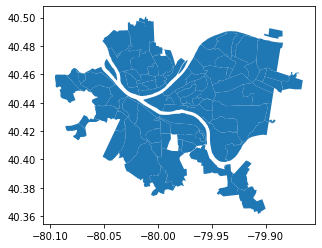

In [6]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()

In [4]:
df['neighborhood'].value_counts().head(10)

Squirrel Hill South    26
Highland Park          20
Hazelwood              10
Beltzhoover             9
Brookline               9
Allegheny Center        9
Troy Hill               8
Beechview               7
Sheraden                6
Lower Lawrenceville     6
Name: neighborhood, dtype: int64

Text(0, 0.5, 'Number of Courts and Rinks')

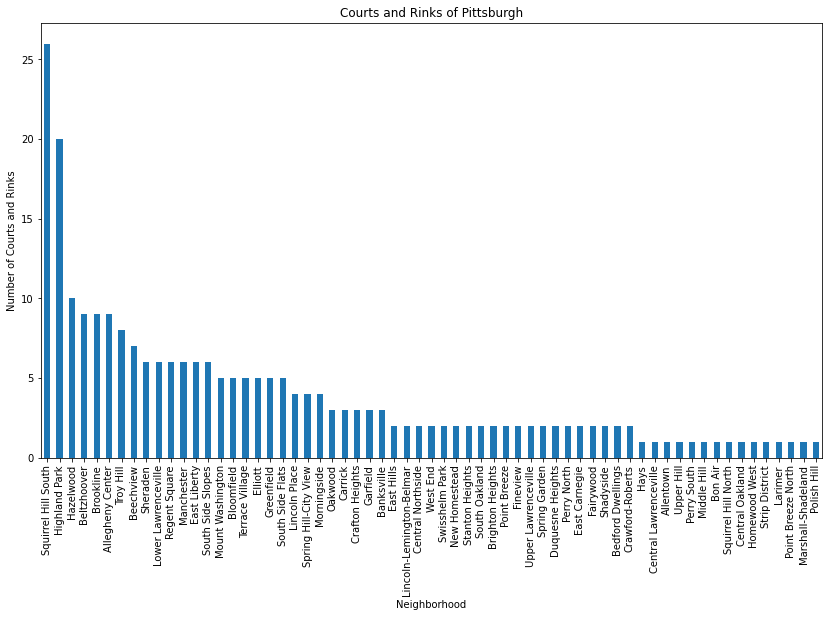

In [5]:
df['neighborhood'].value_counts().plot( kind='bar', figsize=(14,8) )
plt.title("Courts and Rinks of Pittsburgh")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Courts and Rinks")